### ANALYSIS
* Capomulin slowed down the spread of metastatic sites even though it did not prevent it completely. The other three drugs increased the spread of metastatic sites. 
* Capomulin also helped in reducing the size of tumors compared to the other drugs. 
* The survival rate for mice was lowest when they were subjected to Infubinol, but highest when they were subjected to Capomulin 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merge_data = pd.merge(clinical_trial_pd,mouse_drug_pd,on='Mouse ID',how='left')

# Display the data table for preview
merge_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = merge_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_tumor_volume = tumor_volume.mean()

# Convert to DataFrame
avg_tumor_volume = avg_tumor_volume.reset_index()
#avg_tumor_volume_df = pd.DataFrame(avg_tumor_volume)

# Preview DataFrame
avg_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = tumor_volume.sem()
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)
# Preview DataFrame

standard_error_df = standard_error_df.reset_index()
standard_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
#https://janakiev.com/blog/pandas-multiindex-pivot/ - used this for reference
standard_error_df=standard_error_df.pivot(index = 'Timepoint', columns='Drug',values='Tumor Volume (mm3)')
standard_error_df.head()
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_volume_df = avg_tumor_volume.pivot(index = 'Timepoint', columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
avg_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


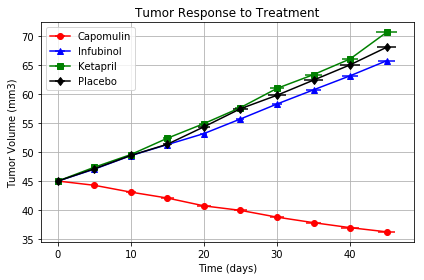

In [5]:
# creating lists of drug data 
timepoint = avg_tumor_volume["Timepoint"].unique()
capomulin = avg_tumor_volume_df["Capomulin"].values
infubinol = avg_tumor_volume_df["Infubinol"].values
ketapril = avg_tumor_volume_df["Ketapril"].values
placebo = avg_tumor_volume_df["Placebo"].values
standard_error_capomulin = standard_error_df["Capomulin"].values
standard_error_infubinol = standard_error_df["Infubinol"].values
standard_error_ketapril = standard_error_df["Ketapril"].values
standard_error_placebo = standard_error_df["Placebo"].values
# Generate the Plot (with Error Bars)
plt.errorbar(timepoint, capomulin, xerr= standard_error_capomulin,marker='o',color='red', label="Capomulin")
plt.errorbar(timepoint, infubinol,xerr= standard_error_infubinol, marker = '^', color = 'blue', label = "Infubinol")
plt.errorbar(timepoint, ketapril,xerr= standard_error_ketapril, marker = 's', color = 'green', label = "Ketapril")
plt.errorbar(timepoint, placebo,xerr= standard_error_placebo, marker = 'd', color = 'black', label = "Placebo" )

plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)



# Save the Figure
plt.tight_layout()
plt.savefig("Images/tumor_response.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = merge_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met_site = met_site.mean()

# Convert to DataFrame
avg_met_site = avg_met_site.reset_index()

# Preview DataFrame
avg_met_site.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error = met_site.sem()
# Convert to DataFrame
met_standard_error_df = met_standard_error.reset_index()

# Preview DataFrame

#met_standard_error_df=met_standard_error_df.pivot(index = 'Timepoint', columns='Drug',values='Metastatic Sites')
#met_standard_error_df
met_standard_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
met_standard_error_df=met_standard_error_df.pivot(index = 'Timepoint', columns='Drug',values='Metastatic Sites')
met_standard_error_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [9]:

# Minor Data Munging to Re-Format the Data Frames
mean_met_site = avg_met_site.pivot(index = 'Timepoint', columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_met_site.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


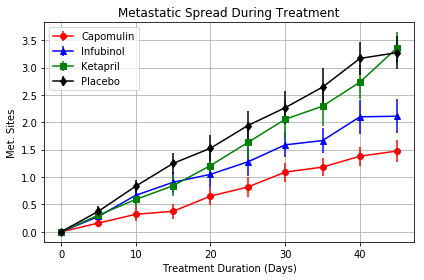

In [10]:
# Create lists of drug data 
timepoint = avg_met_site["Timepoint"].unique()
capomulin = mean_met_site["Capomulin"].values
infubinol = mean_met_site["Infubinol"].values
ketapril = mean_met_site["Ketapril"].values
placebo = mean_met_site["Placebo"].values
standard_error_capomulin = met_standard_error_df["Capomulin"].values
standard_error_infubinol = met_standard_error_df["Infubinol"].values
standard_error_ketapril = met_standard_error_df["Ketapril"].values
standard_error_placebo = met_standard_error_df["Placebo"].values
# Generate the Plot (with Error Bars)
plt.errorbar(timepoint, capomulin, yerr= standard_error_capomulin,marker='o',color='red', label="Capomulin")
plt.errorbar(timepoint, infubinol,yerr= standard_error_infubinol, marker = '^', color = 'blue', label = "Infubinol")
plt.errorbar(timepoint, ketapril,yerr= standard_error_ketapril, marker = 's', color = 'green', label = "Ketapril")
plt.errorbar(timepoint, placebo,yerr= standard_error_placebo, marker = 'd', color = 'black', label = "Placebo" )

plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(True)

# Save the Figure
plt.tight_layout()
plt.savefig("Images/metastatic_spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_data =merge_data.groupby(["Drug", "Timepoint"]).nunique()["Mouse ID"].reset_index(name="Mouse Count")
#mouse_count = mouse_data.nunique()
# Convert to DataFrame
#mouse_count.reset_index(name = "Mouse Count")
# Preview DataFrame
#mouse_count.head()
mouse_data.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_data.pivot(index = 'Timepoint', columns='Drug',values='Mouse Count')

# Preview the Data Frame
mouse_pivot.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


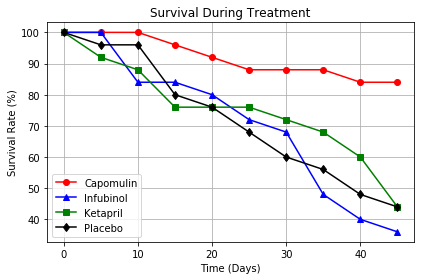

In [13]:
# Generate the Plot (Accounting for percentages)
timepoint = merge_data["Timepoint"].unique()
mouse_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
#y = 0
for x in mouse_list:
    mouse = mouse_pivot[x][0]
    mouse_survival = (mouse_pivot[x]/mouse)*100
    #print(mouse_survival)
    #print (x)
    #print (mouse_list[y])
    #print(mouse_pivot[x])
    #print(mouse_pivot[x])

    #if x== 9:
    #if mouse_pivot[x][0]==45
    if x == "Capomulin":
        plt.plot(timepoint, mouse_survival, marker='o',color='red', label="Capomulin")
        #if mouse_pivot[x][0]==45:
        
        #y = y+1
    if x  == "Infubinol":
        plt.plot(timepoint, mouse_survival,marker='^',color='blue', label="Infubinol")
        #y = y+1  
    if x  == "Ketapril":
        plt.plot(timepoint, mouse_survival,marker='s',color='green', label="Ketapril")
    if x  == "Placebo":
        plt.plot(timepoint, mouse_survival,marker='d',color='black', label="Placebo")
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)

# Save the Figure
plt.tight_layout()
plt.savefig("Images/mouse_survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
#capomulin_percent_change= ((avg_tumor_volume_df["Capomulin"][45] - avg_tumor_volume_df["Capomulin"][0])/45)*100
#ceftamin_percent_change = ((avg_tumor_volume_df["Ceftamin"][45] - avg_tumor_volume_df["Ceftamin"][0])/45)*100
#infubinol_percent_change = ((avg_tumor_volume_df["Infubinol"][45] - avg_tumor_volume_df["Infubinol"][0])/45)*100
#ketapril_percent_change = ((avg_tumor_volume_df["Ketapril"][45] - avg_tumor_volume_df["Ketapril"][0])/45)*100
#naftisol_percent_change = ((avg_tumor_volume_df["Naftisol"][45] - avg_tumor_volume_df["Naftisol"][0])/45)*100
#placebo_percent_change = ((avg_tumor_volume_df["Placebo"][45] - avg_tumor_volume_df["Placebo"][0])/45)*100
#propriva_percent_change = ((avg_tumor_volume_df["Propriva"][45] - avg_tumor_volume_df["Propriva"][0])/45)*100
#ramicane_percent_change = ((avg_tumor_volume_df["Ramicane"][45] - avg_tumor_volume_df["Ramicane"][0])/45)*100
#stelasyn_percent_change = ((avg_tumor_volume_df["Stelasyn"][45] - avg_tumor_volume_df["Stelasyn"][0])/45)*100
#zoniferol_percent_change = ((avg_tumor_volume_df["Zoniferol"][45] - avg_tumor_volume_df["Zoniferol"][0])/45)*100

# Display the data to confirm
#percent_change = pd.DataFrame({"Drug": ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", 
                                       #"Ramicane", "Stelasyn","Zoniferol"],
                               #"Percent Change":[capomulin_percent_change, ceftamin_percent_change, infubinol_percent_change,
                                                 #ketapril_percent_change, naftisol_percent_change, placebo_percent_change,
                                                 #propriva_percent_change, ramicane_percent_change, stelasyn_percent_change,
                                                 #zoniferol_percent_change]
                              #})
#print(percent_change)
#since .iloc[-1] gives you the last row of the dataframe and .iloc[0]gives you the first row
percent_change = (avg_tumor_volume_df.iloc[-1]/(avg_tumor_volume_df.iloc[0])-1)*100 
percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

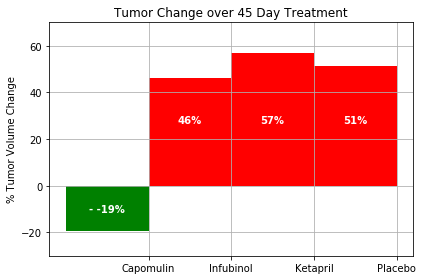

In [15]:
# Store all Relevant Percent Changes into a Tuple

drug_change = (percent_change["Capomulin"],
                    percent_change["Infubinol"],
                    percent_change["Ketapril"],
                    percent_change["Placebo"])
drug_axis = ['Capomulin','Infubinol','Ketapril','Placebo']

# Splice the data between passing and failing drugs

colors = []
for a in drug_change:
    if a < 0:
        colors.append('green')
    else:
        colors.append('red')
        
#print(passing_values) 
# Orient widths. Add labels, tick marks, etc. 
drug_graph = plt.bar(drug_axis,drug_change,width=-1,align='edge',color=colors)

plt.title('Tumor Change over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
#plt.xlim(0, len(drug_axis))
plt.ylim(-30,70)
plt.grid()

tick_location = pd.Index(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.xticks(np.arange(len(tick_location)), tick_location)


# Use functions to label the percentages of changes
#Referenced https://www.w3resource.com/graphics/matplotlib/barchart/matplotlib-barchart-exercise-13.php
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >0:
            label = 26
            plt.text(rect.get_x() + rect.get_width()/2., label,
                '%d%%' % int(height),color='white',weight = 'bold',
                ha='center', va='bottom')
    
    for rect in rects:
        height = rect.get_height()
        if height <0:
            labels = -12
            
        plt.text(rect.get_x() + rect.get_width()/2., labels,
                '- %d%%' % int(height),color='white',weight = 'bold',
                ha='center', va='bottom')
# Call functions to implement the function calls
autolabel(drug_graph)


# Save the Figure

plt.tight_layout()
plt.savefig("Images/tumor_change_treatment.png")
# Show the Figure
plt.show()
